<!--Header-->
<div>
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
            <img src="http://materials.cv.uoc.edu/cdocent/common/img/logo-uoc.png" alt="Logo UOC" class="img-responsive" style="margin:20px 0px 0px">
        </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 40px;">Eines de visualització de dades</h1>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #FCB517;padding: 10px 20px;">
        <div class="col-md-6">
            <div>PID_00233252</div>
        </div>
        <div class="col-md-6">
            <div style="text-align:right;">Autor: Xavier Duran Albareda <span style="margin-left: 30px;">Coordinació: Julià Minguillón</span></div>
        </div>
    </div>
</div>
<!--/Header-->

## Introducció

La visualització de dades és una part imprescindible en la mineria de dades. El primer que fem quan ens enfrontem a un nou conjunt de dades és l'anàlisi exploratori que ens permet conèixer millor les nostres dades. En aquesta fase, ser capaços de crear visualitzacions ajuda notablement a entendre l'estructura i veure més clares les relacions entre les variables, sobretot quan ens enfrontem a _datasets_ grans o amb una alta dimensionalitat.

Podem veure l'anàlisi visual de les dades inclòs en un procés continu de _feedback_ entre la visualització i la construcció de models estadístics, com ens proposa Keim (diagrama). Un model estadístic més adequat ens permet  crear millors visualitzacions que alhora, ens donaran pistes per construir models més complexos i detallats.

![](images/keim.png)

En aquesta activitat presentarem algunes de les llibreries més utilitzades en Python per generar visualitzacions i mostrarem exemples de com fer els gràfics més habituals.

## Llibreries de visualització de dades

### Matplotlib

[Matplotlib](https://matplotlib.org/) és la llibreria de visualització de dades més popular, i permet crear visualitzacions bastant fàcilment.

![Matplotlib](images/matplotlib.png)

### Seaborn

[Seaborn](https://seaborn.pydata.org/) és una llibreria basada en Matplotlib que està enfocada en la visualització de models estadítics. Seaborn no pretén substituir Matplotlib, sinó complementar-la per tal de poder fer visualitzacions més complexes amb una programació a alt nivell i amb menys esforç.

![Seaborn](images/seaborn.png)

### Bokeh

[Bokeh](https://bokeh.pydata.org/en/latest/) és una altra llibreria de visualització de dades enfocada a les visualitzacions interactives. A diferència de Seaborn, Bokeh és independent de Matplotlib. El principal focus de Bokeh és la interacció a la web a l'estil dels documents centrats en dades [D3.js Data-Driven Documents](https://d3js.org/).

![Bokeh](images/bokeh.png)

## _House prices dataset_

El conjunt de dades que farem servir en aquesta activitat correspon al _dataset_ [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) que és una de les competicions d'iniciació de [Kaggle](www.kaggle.com).

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('data/train.csv')

## Visualitzacions més comuns

A continuació veurem algunes de les visualitzacions més comuns i com implementar-les en alguna de les tres llibreries que hem presentat abans.

### Diagrama de barres

El diagrama de barres és una de les visualitzacions més comuns. Ens mostra la relació entre una variable numèrica i una altra de categòrica. Per exemple, podem mostrar la relació entre el nombre de banys d'una vivenda i el preu de venda mitjà.

En aquest exemple, primer calcularem la mitjana de preu de venda per nombre de banys i després farem servir la funció `plot` de Matplotlib per visualitzar-la.

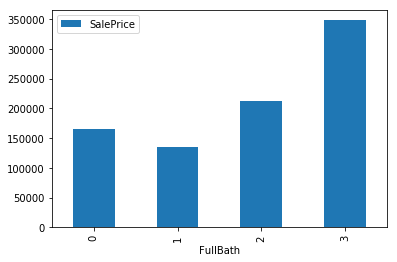

In [47]:
pivot = df_train.pivot_table(index='FullBath', values='SalePrice', aggfunc=np.mean)
pivot.plot(kind='bar')

### Histograma i diagrama de densitat

Un histograma ens permet representar gràficament la distribució d'una variable numèrica. La variable es divideix en diferents particions o _bins_ que representen un rang de valors de la variable. Per cada partició es representa el nombre d'observacions amb aquell rang de valors. La forma de l'histograma pot canviar considerablement depenent del nombre de particions que definim.

A continuació mostrarem la distribució de la variable `SalePrice` amb diferent nombre de particions. Farem servir la funció `distplot` de la llibreria Seaborn.

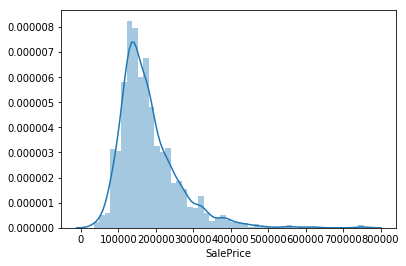

In [48]:
sns.distplot(df_train["SalePrice"])

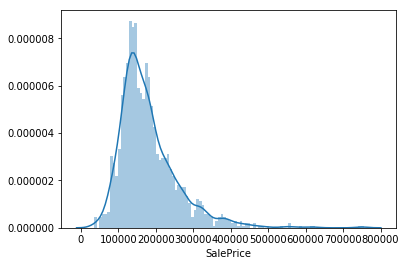

In [49]:
sns.distplot(df_train["SalePrice"], bins=100)

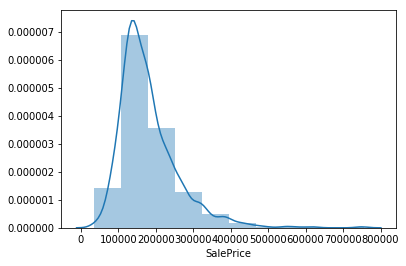

In [52]:
sns.distplot(df_train["SalePrice"], bins=10)

El diagrama de densitat és

A density plot shows the distribution of a numerical variable. It takes only set of numeric values as input. It is really close to a histogram. Since it is a really common dataviz technique, most of the dataviz libraries allow to draw it. Note that it is highly recommended to play with the bandwith argument in order not to miss a specific pattern in the data. Note that you can compare the distribution of several variables plotting them on the same axis, using faceting or through a joyplot.

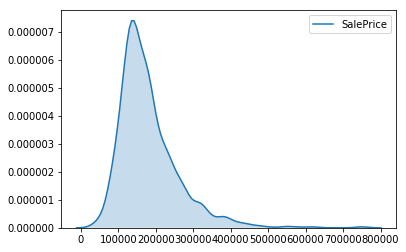

In [37]:
sns.kdeplot(df_train["SalePrice"], shade=True)

### Diagrama de caixes i de violí

Boxplot is probably one of the most common type of graphic. It gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines shows the highest and lowest value excluding outliers. Note that boxplot hide the number of values existing behind the variable. Thus, it is highly advised to print the number of observation, add unique observation with jitter or use a violinplot if you have many observations.

A boxplot summarizes the distribution of a numerical variable for one or several groups. Thus, it hides the underlying distribution and the number of points of each group. That makes this chart dangerous. This post gives an example of possible mistake, and 3 solutions to fix it.

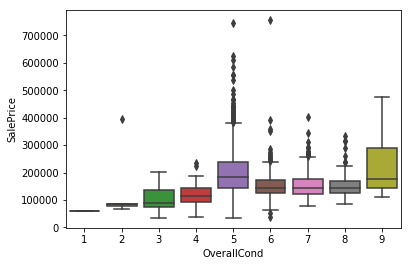

In [19]:
sns.boxplot(x=df_train["OverallCond"], y=df_train["SalePrice"])

Violinplots allow to visualize the distribution of a numeric variable for one or several groups. It is really close from a boxplot, but allows a deeper understanding of the density. Violins are particularly adapted when the amount of data is huge and showing individual observations gets impossible. Seaborn is particularly adapted to realize them through its violin function. Violinplots are a really convenient way to show the data and would probably deserve more attention compared to boxplot that can sometimes hide features of the data.

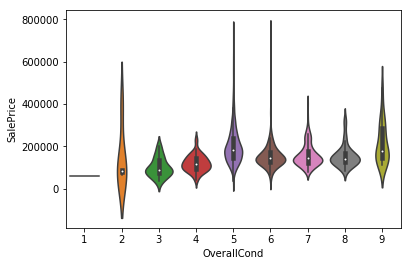

In [20]:
sns.violinplot(x=df_train["OverallCond"], y=df_train["SalePrice"])

### Diagrama de dispersió

A Scatterplot displays the value of 2 sets of data on 2 dimensions. Each dot represents an observation. The position on the X (horizontal) and Y (vertical) axis represents the values of the 2 variables. It is really useful to study the relationship between both variables. It is common to provide even more information using colors or shapes (to show groups, or a third variable). It is also possible to map another variable to the size of each dot, what makes a bubble plot. If you have many dots and struggle with overplotting, consider using 2D density plot.

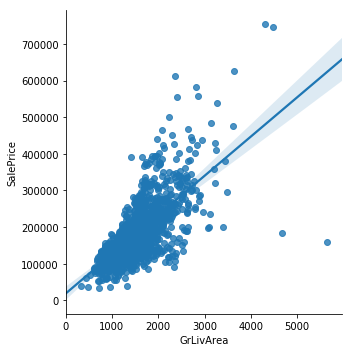

In [24]:
sns.lmplot(x="GrLivArea", y="SalePrice", data=df_train, fit_reg=True, legend=False)

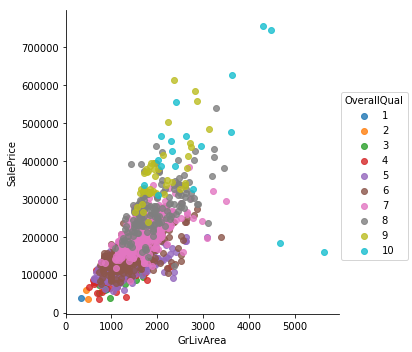

In [32]:
sns.lmplot(x="GrLivArea", y="SalePrice", data=df_train, fit_reg=False, hue="OverallQual", legend=True)

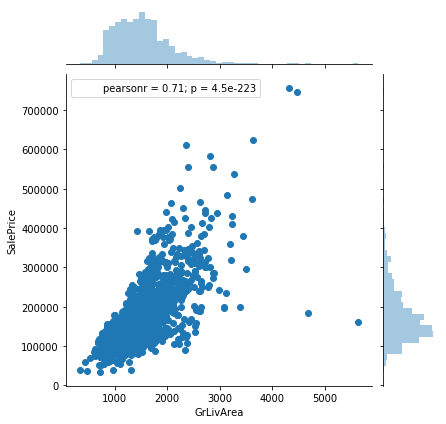

In [30]:
sns.jointplot(x="GrLivArea", y="SalePrice", data=df_train, kind='scatter')

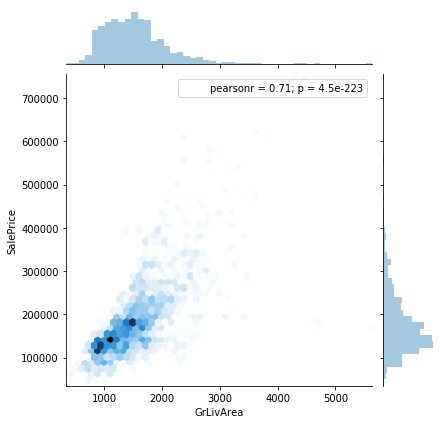

In [31]:
sns.jointplot(x="GrLivArea", y="SalePrice", data=df_train, kind='hex')

### Mapa de calor

A heat map (or heatmap) is a graphical representation of data where the individual values contained in a matrix are represented as colors. It is a bit like looking a data table from above. It is really useful to display a general view of numerical data, not to extract specific data point. It is quite straight forward to make a heat map, as shown on the examples below. However be careful to understand the underlying mechanisms. You will probably need to normalise your matrix, choose a relevant colour palette, use cluster analysis and thus permute the rows and the columns of the matrix to place similar values near each other according to the clustering.

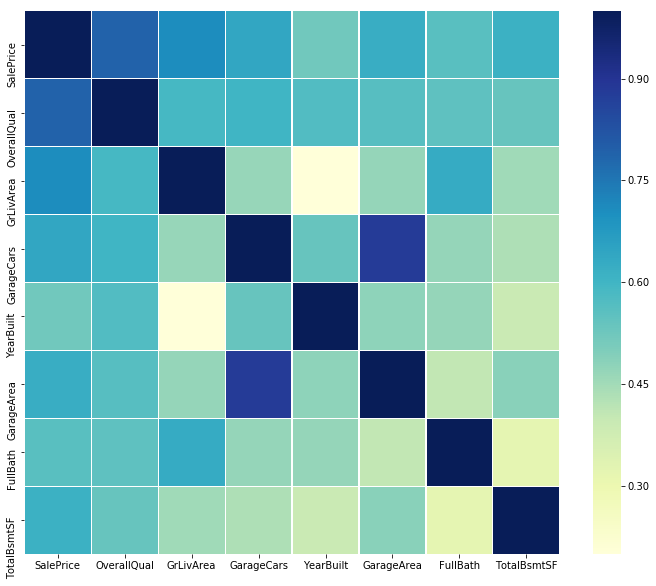

In [36]:
corrmat = df_train.corr(method='spearman')
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cm, ax=ax, cmap="YlGnBu", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values)

## Conclusió

Hem vist algunes de les visualitzacions més comunes i com implementar-les en les llibreries Matplotlib, Seaborn i Bokeh. La clau per una bona visualització de les dades és tenir clar quina visualització triar i perquè, depenent de la naturalesa de les dades, i després saber triar l'eina per fer-la possible.

## Bibliografia

Keim, D. A., Mansmann, F., Schneidewind, J., Thomas, J., & Ziegler, H. (2008). Visual analytics: Scope and challenges. In Visual data mining (pp. 76-90). Springer, Berlin, Heidelberg.

Minguillón, J. (2017). Anàlisi visual de dades: conceptes bàsics i eines. Item: revista de biblioteconomia i documentació, 2(63).

[The Python Graph Gallery](https://python-graph-gallery.com/)

<!--Footer>
 <div style="background: #333333;padding: 35px 0px;margin-top: 25px;">
    <div class="row">
     <div class="col-sm-12">
        <img src="http://materials.cv.uoc.edu/cdocent/common/img/logo-uoc-bottom.png" alt="Logo UOC" class="img-responsive" style="margin: 0 auto; display: block;">
    </div>
</div>
</div>
<!--/Footer-->